
# Unit 2 Build



In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 100)


In [2]:
# Read data from NYC restaurant inspections Mar 2020 dataset

df = pd.read_csv('/Users/jasimrashid/Projects/DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

# Update headers to lower case
df.columns = [i.lower() for i in df.columns]

# Drop all records with null grades 
df = df[df['grade'].isnull()==False]

# TODO: summarize numeric features from null grade records
# TODO: strategy for grades other than A, B, C
# TODO: add this to wrangle function

df.shape

(198130, 26)

In [3]:
# Read NYC census data & merge into restaurant innspection dataframe
nyc_census = pd.read_csv('/Users/jasimrashid/Projects/NYC_census_2010_v2.csv')
nyc_census['census tract'] = nyc_census['census tract'].astype(float)
nyc_census.shape

(2168, 25)

In [4]:
# Clean numeric inputs from NYC_Census: Comma separated numbers stored as string

def clean(x):
    if x=='-':
        return float(0)
    elif isinstance(x, str):
        return float(x.strip('').replace(',',''))
    else:
        return float(0)

column_names = nyc_census.select_dtypes(include='object').columns.tolist()[1:]

nyc_census['persons_per_acre'][-1:]=0

for i in column_names:
    nyc_census[i] = nyc_census[i].apply(clean)

# nyc_census.info()

In [5]:
# Merge inspections dataset and NYC census

df = pd.merge(df,nyc_census, how='inner', on=['boro','census tract'])
df.shape
#TODO: test join condition above

(194904, 49)

In [6]:
df_grouped = df.groupby(['camis','dba','cuisine description','zipcode','community board','council district','census tract','boro','latitude','longitude','inspection date','inspection type','grade date','grade', 'population', 'median_age',
       'total_females', 'total_males', 'population_2000', 'acres',
       'persons_per_acre', 'population_over_17', 'population_under_18',
       'median_age.1', 'white', 'black', 'native', 'asian', 'pacislander',
       'other', 'twoormore', 'hispanic', 'pop_chg_2000_to_2010',
       'pop_chg_2000_to_2010_under_18', 'pop_chg_2000_to_2010_over_18'])['critical flag'].apply(lambda x: (x.isin(['Y'])).sum()).reset_index(name='critical violations').reset_index(level=0,drop=True)

df_restaurants = df_grouped.groupby(['camis','dba','cuisine description','zipcode','community board','council district','census tract','boro','latitude','longitude','population', 'median_age','total_females', 'total_males', 'population_2000', 'acres','persons_per_acre', 'population_over_17', 'population_under_18','median_age.1', 'white', 'black', 'native', 'asian', 'pacislander','other', 'twoormore', 'hispanic', 'pop_chg_2000_to_2010','pop_chg_2000_to_2010_under_18', 'pop_chg_2000_to_2010_over_18'], sort=False,as_index=False)['inspection date', 'inspection type','critical violations','grade date','grade'].first()

df_restaurants.shape

(24261, 36)

In [7]:
#BACKUP
df_grouped_temp = df_grouped.copy()

In [8]:
df_grouped_a = df.groupby(['camis','inspection date','inspection type','grade date','grade','score',
'dba','cuisine description','zipcode','community board','council district','census tract','boro','latitude','longitude', 'population', 'median_age','total_females', 'total_males', 'population_2000', 'acres','persons_per_acre', 'population_over_17', 'population_under_18',
'median_age.1', 'white', 'black', 'native', 'asian', 'pacislander','other', 'twoormore', 'hispanic', 'pop_chg_2000_to_2010','pop_chg_2000_to_2010_under_18','pop_chg_2000_to_2010_over_18'],sort=False, as_index=False)[['violation code']].count()


In [9]:
df_grouped_b = df.groupby(['camis','inspection date'])['critical flag'].apply(lambda x: (x.isin(['Y'])).sum()).reset_index(name='critical violations').reset_index(level=0,drop=True)

In [10]:
df_grouped_a.shape, df_grouped_b.shape

((82004, 37), (82634, 3))

In [11]:
df_grouped = pd.merge(df_grouped_a, df_grouped_b, how='inner', on=['camis','inspection date'])
df_grouped.shape

(82004, 38)

In [12]:
df_grouped['inspection date'] = pd.to_datetime(df_grouped['inspection date'], infer_datetime_format=True)

df_grouped['grade date'] = pd.to_datetime(df_grouped['grade date'], infer_datetime_format=True)
# TODO: add to feature engineering function

In [13]:
df_grouped = df_grouped.sort_values(by = ['camis','inspection date'], ascending=[True, False])

In [14]:
# Adding features for prior-date grade, score, violations, critical violations
df_grouped_len = df_grouped.shape[0]
df_grouped['grade prior']=np.nan
df_grouped['score prior']=np.nan
df_grouped['violations prior']=np.nan
df_grouped['critical violations prior']=np.nan

for i in range(len(df_grouped)-1): #range(df_grouped_len):
    if df_grouped['camis'].iloc[i] == df_grouped['camis'].iloc[i+1]:
        # print(df_grouped['grade'].iloc[i+1])
        df_grouped['grade prior'].iloc[i] = df_grouped['grade'].iloc[i+1]
        df_grouped['score prior'].iloc[i] = df_grouped['score'].iloc[i+1]
        df_grouped['violations prior'].iloc[i] = df_grouped['violation code'].iloc[i+1]
        df_grouped['critical violations prior'].iloc[i] = df_grouped['critical violations'].iloc[i+1]
    # else:
    #     # print(0)
    #     df_grouped['grade_prior'].iloc[i] = 0

# df_grouped['camis'].iloc[1]

In [15]:
df_grouped.shape

(82004, 42)

In [16]:
# BACKUP 
df_restaurants_temp = df_restaurants.copy() #BACKUP
df_temp = df.copy() #BACKUP

In [17]:
# RESTORE
# df_restaurants = df_restaurants_temp
# df = df_temp

In [18]:
df_temp.shape

(194904, 49)

**Pre-Processing**

• N = Not Yet Graded
 
• A = Grade A

• B = Grade B

• C = Grade C

• Z = Grade Pending

• P= Grade Pending issued on re-opening following an initial inspection that resulted in a closure

In [209]:
# TEMPORARY - setting df to df_restaurants
df = df_grouped.copy()

In [268]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


In [210]:
zipcodes = pd.read_csv('/Users/jasimrashid/Downloads/zipcodes.csv')
df = pd.merge(df, zipcodes ,how='inner',on='zipcode')
df.shape

(79450, 43)

In [211]:
df.grade.value_counts(dropna=False, normalize=True)

A    0.864556
B    0.078653
C    0.026344
P    0.020629
Z    0.009755
G    0.000038
N    0.000025
Name: grade, dtype: float64

In [212]:
df.shape

(79450, 43)

In [213]:
%%time
# TEMPORARY

# when df at restaurant level --> drop all records where rating is not A, B or C
condition = df['grade'].isin(['A','B','C'])==True
df = df[condition]
df.shape

CPU times: user 40.9 ms, sys: 23.1 ms, total: 64 ms
Wall time: 80.1 ms


(77031, 43)

In [214]:
# GRADES INTO A AND OTHER
# df['grade1'] =
df[df['grade']!='A']['grade']='not perfectly healthy'

def clean_grades(grade):
    if grade == 'A':
        return 'A'
    else:
        return 'other'

df['grade'] = df['grade'].apply(clean_grades)

In [215]:
# Target label 'no-go'
# TODO: Find a better label
df['no-go'] = df['grade']!='A'
df['no-go'].value_counts(normalize=True)

False    0.891706
True     0.108294
Name: no-go, dtype: float64

**Train / Validate / Test Split**

In [216]:
from sklearn.model_selection import train_test_split


df = df.copy()


train, test = train_test_split(df, train_size=0.8, test_size=.2, stratify=df['no-go'], random_state=42)
# train, test = train_test_split(df, train_size=0.8, test_size=.2, random_state=42)

#2
train, val = train_test_split(train, train_size=0.8, test_size=.2, stratify=train['no-go'], random_state=42)
# train, val = train_test_split(train, train_size=0.8, test_size=.2, random_state=42)

# val = df[(df['inspection year-month']>=201801) & (df['inspection year-month']<201903)]

print('before: ',df.shape)
print('train: ',train.shape)
print('val: ',val.shape)
print('test: ',test.shape)


# ** UPDATE:
# train_val_test_split(df)
# train_val_test_split(df_restaurants)



before:  (77031, 44)
train:  (49299, 44)
val:  (12325, 44)
test:  (15407, 44)


In [217]:
#RECUCING TRAIN SIZE


# train, leaftout = train_test_split(train, train_size=.1, test_size=.8, stratify=train['no-go'], random_state=42)

In [218]:
print('train: ',train.shape)

train:  (49299, 44)


In [219]:
def wrangle(df):

    df = df.copy()

    return df

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)



In [220]:
def divide_by(vec):
    x=vec[0]
    y=vec[1]
    if y==0:
        return np.nan
    else:
        return x/y

def engineer_features(df):

    df = df.copy()

     
    # TODO: Add to engineer features

    df['zipcode']=(df['zipcode'].astype(int)).astype(str)
    df['community board']=(df['community board'].astype(int)).astype(str)
    df['council district']=(df['council district'].astype(int)).astype(str)
    df['census tract']=(df['census tract'].astype(int)).astype(str)

    as_of_date = pd.to_datetime('2020-03-31')
    # df['days_since_inspection'] = (as_of_date - pd.to_datetime(df['inspection date']))/np.timedelta64(1,'D')

    df['grade date']=(df['grade date'].astype(str))
    df['female to male'] = df['total_females']/df['total_males']
    df['adults to minor'] = df[['population_over_17','population_under_18']].apply(divide_by, axis=1)

    df['inspection date year'] = df['inspection date'].dt.year
    df['inspection date month']=train['inspection date'].dt.month
    df['inspection date day']=train['inspection date'].dt.day
    df['inspection date dayofweek']=train['inspection date'].dt.dayofweek

    
    return df


# train = engineer_features(df)

train = engineer_features(train)
val = engineer_features(val)
test = engineer_features(test)


In [221]:
train['inspection date']=train['inspection date'].astype(str)
val['inspection date']=val['inspection date'].astype(str)
test['inspection date']=test['inspection date'].astype(str)

In [29]:
# train.info()

In [225]:
features    

['inspection date',
 'zipcode',
 'council district',
 'census tract',
 'boro',
 'population',
 'population_2000',
 'persons_per_acre',
 'pop_chg_2000_to_2010',
 'pop_chg_2000_to_2010_over_18',
 'grade prior',
 'score prior',
 'violations prior',
 'critical violations prior',
 'neighborhood',
 'female to male',
 'adults to minor',
 'inspection date month',
 'inspection date day',
 'inspection date dayofweek']

In [224]:
#CLASSIFICATION MODEL

target = ['no-go']
# target='grade'

#mandatory exclusions:
leakage=['score','grade','violation code','critical violations']

#unethical
race = ['white','black','native','asian','pacislander','other','twoormore','hispanic']

#optional
irrelevant = ['camis', 'grade date','median_age.1']

#play around #1
col6_excl = ['inspection type','cuisine description','community board','latitude','longitude','median_age','acres','pop_chg_2000_to_2010_under_18','violation code','critical violations', 'inspection date year']

#super-simplify for dash-app

additional = ['total_females','total_males','population_over_17','population_under_18','dba']

mvp_drop = ['population_2000','pop_chg_2000_to_2010_over_18','council district','boro','population','pop_chg_2000_to_2010', 'census tract', 'inspection date','zipcode','inspection date year', 'inspection date day']

drop_columns = target + leakage + race + irrelevant + col6_excl + additional

# train_features = train.drop(columns = [target,'score', 'camis','action','inspection type','violation description','violation code', 'critical flag','boro',
# 'latitude','longitude',
# 'bbl','bin'])

# train_features = train.drop(columns = [target, 'camis','critical violations','grade','inspection type','violation code','score','grade date','white','asian','black','pacislander','other','twoormore','hispanic','dba','latitude','longitude','population_2000','pop_chg_2000_to_2010_under_18','pop_chg_2000_to_2010_over_18','total_females','total_males','population_over_17','population_under_18']) #for restaurant_ratings scenario only

# Drop target
train_features = train.drop(columns = drop_columns)

# , 'inspection date', 'violation code', 'critical violations'])

numeric_features = train_features.select_dtypes(include='number').columns.tolist()

cardinality = train_features.select_dtypes(exclude='number').nunique()

categorical_features = cardinality[cardinality <= 84].index.tolist()

# features = numeric_features + categorical_features #scenario 1

features = train_features.columns.to_list()# + numeric_features# scenario 4 INCLUDE ALL FEATURES 


In [98]:
#REGRESSION MODEL

target = ['score']
# target='grade'

#mandatory exclusions:
leakage=['grade','violation code','critical violations','no-go']

#unethical
race = ['white','black','native','asian','pacislander','other','twoormore','hispanic']

#optional
irrelevant = ['camis', 'grade date','median_age.1']

#play around #1
col6_excl = ['inspection type','cuisine description','community board','latitude','longitude','median_age','acres','pop_chg_2000_to_2010_under_18','violation code','critical violations', 'inspection date year']

#super-simplify for dash-app

additional = ['total_females','total_males','population_over_17','population_under_18','dba']

mvp_drop = ['population_2000','pop_chg_2000_to_2010_over_18','council district','boro','population','pop_chg_2000_to_2010', 'census tract', 'inspection date','zipcode','inspection date year', 'inspection date day']

drop_columns = target + leakage + race + irrelevant + col6_excl

# train_features = train.drop(columns = [target,'score', 'camis','action','inspection type','violation description','violation code', 'critical flag','boro',
# 'latitude','longitude',
# 'bbl','bin'])

# train_features = train.drop(columns = [target, 'camis','critical violations','grade','inspection type','violation code','score','grade date','white','asian','black','pacislander','other','twoormore','hispanic','dba','latitude','longitude','population_2000','pop_chg_2000_to_2010_under_18','pop_chg_2000_to_2010_over_18','total_females','total_males','population_over_17','population_under_18']) #for restaurant_ratings scenario only

# Drop target
train_features = train.drop(columns = drop_columns)

# , 'inspection date', 'violation code', 'critical violations'])

numeric_features = train_features.select_dtypes(include='number').columns.tolist()

cardinality = train_features.select_dtypes(exclude='number').nunique()

categorical_features = cardinality[cardinality <= 84].index.tolist()

# features = numeric_features + categorical_features #scenario 1

features = train_features.columns.to_list()# + numeric_features# scenario 4 INCLUDE ALL FEATURES 


In [237]:
features

['inspection date',
 'zipcode',
 'council district',
 'census tract',
 'boro',
 'population',
 'population_2000',
 'persons_per_acre',
 'pop_chg_2000_to_2010',
 'pop_chg_2000_to_2010_over_18',
 'grade prior',
 'score prior',
 'violations prior',
 'critical violations prior',
 'neighborhood',
 'female to male',
 'adults to minor',
 'inspection date month',
 'inspection date day',
 'inspection date dayofweek']

In [238]:
X_train = train[features]
y_train = train[target[0]]
X_val = val[features]
y_val = val[target[0]]
X_test = test[features]
y_test = test[target[0]]

Predictive Models

**Baseline**

In [239]:
#TODO
from sklearn.metrics import accuracy_score
# y_train.value_counts(normalize=True)
majority_class = y_train.mode()[0]

# Test Set
y_pred = [majority_class]*len(y_train)
print("Baseline - Test Accuracy: ", accuracy_score(y_train, y_pred))

# Validation Set
majority_class = y_val.mode()[0]
y_pred = [majority_class]*len(y_val)
print("Baseline - Validation Accuracy: ", accuracy_score(y_val, y_pred))

Baseline - Test Accuracy:  0.8917016572344266
Baseline - Validation Accuracy:  0.891683569979716


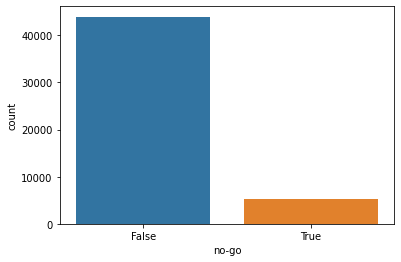

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(y_train);

**Logistic Regression**

In [255]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    LogisticRegression(max_iter=1000)
)

pipeline.fit(X_train, y_train)
print("Linear Regression - Train Accuracy: ",  pipeline.score(X_train, y_train))
print("Linear Regression - Validation Accuracy: ",  pipeline.score(X_val, y_val))


Linear Regression - Train Accuracy:  0.891640804073105
Linear Regression - Validation Accuracy:  0.8916024340770791


In [98]:
import category_encoders as ce
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

gapminder = px.data.gapminder()
X = gapminder[['year', 'continent']]
y = gapminder['lifeExp']

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    LinearRegression()
)

pipeline.fit(X, y)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['continent'], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=True, verbose=0)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [83]:
from joblib import dump
dump(pipeline, 'pipeline.joblib', compress=True)

['pipeline.joblib']

In [84]:
!ls -lh pipeline.joblib

-rw-r--r--  1 jasimrashid  staff   1.6M May 29 10:03 pipeline.joblib


In [73]:
# Get versiokns
import joblib
import sklearn
import category_encoders as ce
import xgboost
print(f'joblib=={joblib.__version__}')
print(f'scikit-learn=={sklearn.__version__}')
print(f'category_encoders=={ce.__version__}')
print(f'xgboost=={xgboost.__version__}')

joblib==0.14.1
scikit-learn==0.22.1
category_encoders==2.2.2
xgboost==1.1.0


In [82]:

# print('hello')

def predict(neighborhood,grade_prior, score_prior, violations_prior, critical_violations_prior,persons_per_acre,female_to_male,adults_to_minor, inspection_date_month, inspection_date_dayofweek):
    
    # print('A')
    # print('hello')
    df = pd.DataFrame(columns=[ 'neighborhood','grade prior','score prior','violations prior','critical violations prior','persons_per_acre','female to male','adults to minor', 'inspection date month','inspection date dayofweek'], data=[[neighborhood,grade_prior, score_prior, violations_prior, critical_violations_prior,persons_per_acre,female_to_male,adults_to_minor, inspection_date_month,inspection_date_dayofweek]])
      
    # print(pipeline.predict(df)[0])
    # y_pred = pipeline.predict(df)[0]
    # print(df)

    if y_pred == 'True':
        y_pred_proba = pipeline.predict_proba(df)[0][0]
        return f'{y_pred_proba*100:.0f}% probability'# of a {y_pred}'
    else:
        y_pred_proba = pipeline.predict_proba(df)[0][1]
        return f'{y_pred_proba*100:.0f}% probability'# {y_pred}'

predict('Lower Manhattan','A',10,10,9,200,1,20,1,2)

predict('Lower Manhattan','A',10,10,9,200,1,20,1,2)

    # predict('Lower Manhattan','A',10,10,9,200,1,20,1,2)

    


'37% probability'

In [107]:
def predict(year, continent):
    df = pd.DataFrame(
        columns=['year', 'continent'], 
        data=[[year, continent]]
    )
    y_pred = pipeline.predict(df)[0]
    return f'{y_pred:.0f} years'

In [241]:
# # SCENARIO 1
# # Decision tree w/ OneHot Encoding
# import category_encoders as ce 
# from sklearn.impute import SimpleImputer
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler

# pipeline = make_pipeline(
#     ce.OneHotEncoder(use_cat_names=True),
#     SimpleImputer(strategy='mean'),
#     DecisionTreeClassifier(random_state=42)    
# )

# pipeline.fit(X_train, y_train)
# print(pipeline.score(X_train, y_train))
# print(pipeline.score(X_val, y_val))
# y_pred = pipeline.predict(X_val)


In [242]:
# SCENARIO 2
# Decision tree w/ Ordinal Encoding

import category_encoders as ce 
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    DecisionTreeClassifier(random_state=42)
    
)

pipeline.fit(X_train, y_train)
print(pipeline.score(X_train, y_train))
print(pipeline.score(X_val, y_val))
y_pred = pipeline.predict(X_val)


0.9976267267084525
0.7905882352941176


In [243]:
# SCENARIO 3
# Random Forest with Ordinal Encoding

import category_encoders as ce 
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(random_state=42)
)

pipeline.fit(X_train, y_train)
score_test = pipeline.score(X_train, y_train)
score_val = pipeline.score(X_val, y_val)
print(score_test)
print(score_val)
y_pred = pipeline.predict(X_val)


0.9975455891600236
0.8901419878296146


In [252]:
# SCENARIO 4
# XGB Classifier
import category_encoders as ce
from sklearn.impute import SimpleImputer
import pandas as pd
import seaborn as sns

# titanic = sns.load_dataset('titanic')
# X = titanic[['age', 'class', 'deck', 'embarked', 'fare', 'sex']]
# y = titanic['survived']

encoder = ce.OrdinalEncoder(handle_unknown='ignore')
imputer = SimpleImputer(strategy='mean')

X_train_transformed = encoder.fit_transform(X_train)
X_train_imputed = imputer.fit_transform(X_train_transformed) #OPT
X_val_transformed = encoder.transform(X_val)
X_val_imputed = imputer.transform(X_val_transformed) #OPT


In [253]:
# XGBoost #1 
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

model = XGBClassifier()
model.fit(X_train_imputed, y_train)
cross_val_score(model, X_val_imputed, y_val, scoring='accuracy', cv=10, n_jobs=-1)


array([0.8864558 , 0.88321168, 0.87510138, 0.8864558 , 0.87996756,
       0.88149351, 0.89123377, 0.87824675, 0.88636364, 0.89123377])

In [248]:
# XGBoost Tuned

model = XGBClassifier(
    learning_rate = .5,
    n_estimators = 1000,
    max_depth = 7,
    
    # the below params fixed an error 
    # TODO: research the parameters below
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',
    nthread=4,
    scale_pos_weight=1,
    seed=27,

    n_jobs=-1,
    num_class = 2
)

eval_set = [(X_train_imputed, y_train),
            (X_val_imputed, y_val)]

model.fit(X_train_imputed, y_train,eval_set=eval_set,eval_metric='merror',early_stopping_rounds=100) #OPT
cross_val_score(model, X_val_imputed, y_val, scoring='accuracy', cv=10, n_jobs=-1)

# TODO: random search CV - play around with hyper parameter + save model results


[21:15:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-merror:0.10552	validation_1-merror:0.10962
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.10572	validation_1-merror:0.10945
[2]	validation_0-merror:0.10491	validation_1-merror:0.10970
[3]	validation_0-merror:0.10442	validation_1-merror:0.10962
[4]	validation_0-merror:0.10388	validation_1-merror:0.10937
[5]	validation_0-merror:0.10349	validation_1-merror:0.10945
[6]	validation_0-merror:0.10304	validation_1-merror:0.10953
[7]	validation_0-merror:0.10231	validation_1-merro

array([0.8702352 , 0.86699108, 0.85077048, 0.86293593, 0.86050284,
       0.85633117, 0.85633117, 0.85064935, 0.86038961, 0.87581169])

Text(0.5, 1.0, 'Validation Curve for this XGBoost model')

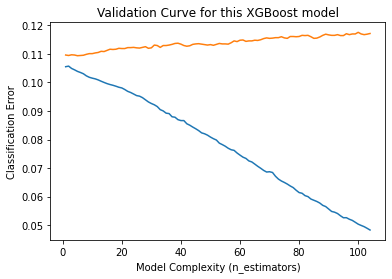

In [249]:
results = model.evals_result()
train_error = results['validation_0']['merror']
val_error = results['validation_1']['merror']
epoch = list(range(1, len(train_error)+1))
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.title('Validation Curve for this XGBoost model')
#plt.ylim((0.18, 0.22)) # Zoom in
#plt.legend();

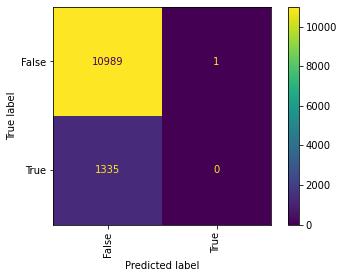

In [262]:
# Cannot easily be run on XGBoost

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipeline, X_val, y_val, values_format='.0f', xticks_rotation='vertical')

from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(model, X_val_transformed, y_val, values_format='.0f', xticks_rotation='vertical')

In [941]:
X_train.columns

Index(['cuisine description', 'dba', 'boro', 'days_since_inspection',
       'median_age.1', 'total_females', 'council district', 'census tract',
       'population_over_17', 'total_males', 'grade date', 'persons_per_acre',
       'inspection date', 'population', 'pop_chg_2000_to_2010_over_18',
       'population_2000', 'population_under_18', 'zipcode',
       'pop_chg_2000_to_2010', 'median_age'],
      dtype='object')

In [263]:
# SCENARIO 4
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

precision    recall  f1-score   support

       False       0.89      1.00      0.94     10990
        True       0.35      0.02      0.03      1335

    accuracy                           0.89     12325
   macro avg       0.62      0.51      0.49     12325
weighted avg       0.83      0.89      0.84     12325



In [256]:
# ROC for non-XGB
from sklearn.metrics import roc_auc_score
y_pred_proba = pipeline.predict_proba(X_val)[:, -1]  # Probability for the last class
roc_auc = roc_auc_score(y_val, y_pred_proba) #SCENARIO 4 - 0.5775
print(roc_auc)
# y_pred_proba[:5]

0.5861280428581652


In [257]:
#ROC for XGB

from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_val_imputed)[:, -1]  # Probability for the last class
roc_auc = roc_auc_score(y_val, y_pred_proba) #SCENARIO 4 - 0.5775
print(roc_auc)
# y_pred_proba[:5]

0.6208542324823725


In [181]:
pipeline.predict_proba(X_val)

array([[0.98, 0.02],
       [0.92, 0.08],
       [0.88, 0.12],
       ...,
       [0.89, 0.11],
       [0.97, 0.03],
       [0.99, 0.01]])

In [259]:
pipeline

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['inspection date', 'zipcode',
                                      'council district', 'census tract',
                                      'boro', 'grade prior', 'neighborhood'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'inspection date',
                                          'data_type': dtype('O'),
                                          'mapping': 2019-10-17       1
2018-05-30       2
2018-09-27       3
2016-04-26       4
2017-07-18       5...
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False

In [145]:
pipeline

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['grade prior', 'neighborhood'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'grade prior',
                                          'data_type': dtype('O'),
                                          'mapping': B      1
A      2
NaN    3
C      4
P      5
dtype: int64},
                                         {'col': 'neighborhood',
                                          'data_type': dtype('O'),
                                          'mapping': High Bridge and Morrisania        1
Greenwich Village and So...
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('logisticregression',
               

In [740]:
X_val_transformed.shape

(3757, 16)

In [690]:
pd.DataFrame(X_val_transformed)

,cuisine description,dba,boro,days_since_inspection,median_age.1,total_females,council district,census tract,population_over_17,total_males,grade date,persons_per_acre,inspection date,population,pop_chg_2000_to_2010_over_18,population_2000,population_under_18,zipcode,pop_chg_2000_to_2010,median_age
4780,4,2785.0,5,1148.0,38.8,1492.0,41,731.0,2311.0,1458.0,548.0,27.2,548.0,2950.0,-31.0,3118.0,639.0,41.0,-168.0,38.8
16015,18,NaN,4,1125.0,37.5,2201.0,11,360.0,3514.0,2181.0,143.0,54.8,143.0,4382.0,444.0,3891.0,868.0,23.0,491.0,37.5
22967,27,NaN,2,76.0,36.6,1661.0,3,146.0,2530.0,1380.0,350.0,81.8,350.0,3041.0,37.0,2955.0,511.0,3.0,86.0,36.6
1163,21,NaN,2,1092.0,30.3,1585.0,17,121.0,2495.0,1714.0,454.0,56.2,454.0,3299.0,167.0,3229.0,804.0,117.0,70.0,30.3
18940,3,NaN,1,25.0,30.0,4048.0,15,137.0,7275.0,3566.0,669.0,176.6,669.0,7614.0,837.0,6753.0,339.0,5.0,861.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422,7,885.0,2,986.0,30.4,4166.0,6,265.0,6074.0,3459.0,47.0,135.3,47.0,7625.0,738.0,7681.0,1551.0,131.0,-56.0,30.4
4744,15,NaN,1,77.0,37.0,2923.0,5,634.0,5830.0,3415.0,241.0,155.0,241.0,6338.0,1466.0,4626.0,508.0,61.0,1712.0,37.0
16604,3,NaN,2,200.0,39.6,1045.0,51,1004.0,1513.0,884.0,691.0,37.5,691.0,1929.0,-74.0,2186.0,416.0,164.0,-257.0,39.6
9685,3,NaN,1,420.0,43.0,3873.0,5,58.0,8010.0,4681.0,168.0,194.3,168.0,8554.0,309.0,8288.0,544.0,7.0,266.0,43.0


In [614]:
len(X_train.columns.to_list())

26

In [527]:
# RECORD MODEL
record_model()

[[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                         warm_start=False),
  0.9998003593531644,
  0.9238754325259516,
  0.5529466751560326],
 [XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None, gamma=None,
                gpu_id=None, importance_type='gain', interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints

In [152]:
# Are you curious to better understand this?

# "The ROC curve is created by plotting the true positive rate (TPR)
# against the false positive (FPR) at various threshold settings."

# Use sklearn to calculate TPR & FPR at various thresholds
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

In [151]:
# # See the results in a table
# pd.DataFrame({
#     'False Positive Rate': fpr, 
#     'True Positive Rate': tpr, 
#     'Threshold': thresholds
# })

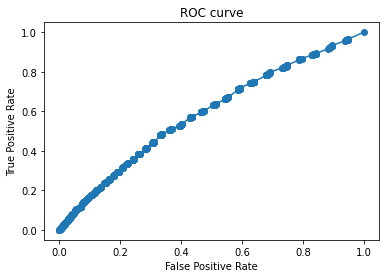

In [232]:
# SCENARIO 4
# See the results on a plot.
# This is the "Receiver Operating Characteristic curve"
import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [231]:
# # SCENARIO 1

# # https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
# import graphviz
# from sklearn.tree import export_graphviz

# model = pipeline.named_steps['decisiontreeclassifier']
# encoder = pipeline.named_steps['onehotencoder']
# encoded_columns = encoder.transform(X_val).columns

# dot_data = export_graphviz(model, 
#                            out_file=None, 
#                            max_depth=4, 
#                            feature_names=encoded_columns,
#                            class_names=y_train.unique().astype(str), 
#                         #    class_names=model.classes_, 
#                            impurity=False, 
#                            filled=True, 
#                            proportion=True )
#                         #    rounded=True)   
# display(graphviz.Source(dot_data))

In [662]:
y_train.value_counts(normalize=True)

False    0.894757
True     0.105243
Name: no-go, dtype: float64

In [161]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

precision    recall  f1-score   support

           A       0.99      0.97      0.98     19209
           B       0.88      0.97      0.92      3026
           C       0.90      0.92      0.91      1077
           G       1.00      1.00      1.00         1
           N       1.00      1.00      1.00        10
           P       0.63      0.51      0.56       345
           Z       0.33      1.00      0.50         1

    accuracy                           0.96     23669
   macro avg       0.82      0.91      0.84     23669
weighted avg       0.96      0.96      0.96     23669



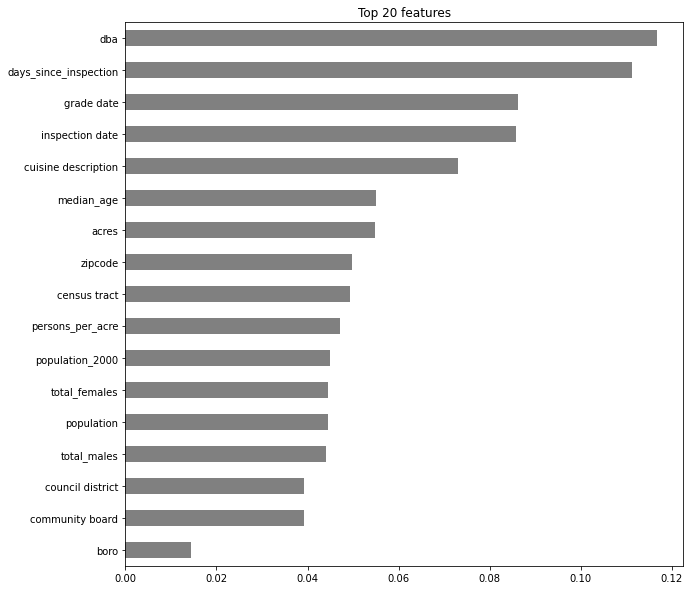

In [28]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [644]:
column  = 'latitude'

# Fit without column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train.drop(columns=column), y_train)
score_without = pipeline.score(X_val.drop(columns=column), y_val)
print(f'Validation Accuracy without {column}: {score_without}')

# Fit with column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy with {column}: {score_with}')

# Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Validation Accuracy without latitude: 0.8938691396187533
Validation Accuracy with latitude: 0.895414734672849
Drop-Column Importance for latitude: 0.0015455950540957941


In [670]:
# Eli5 pre-step: Random Forest Model Fit

transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [233]:
# Eli5 pre-step: XGBoost
import category_encoders as ce
from sklearn.impute import SimpleImputer
encoder = ce.OrdinalEncoder(handle_unknown='ignore')
imputer = SimpleImputer(strategy='mean')
X_train_transformed = encoder.fit_transform(X_train)
X_train_imputed = imputer.fit_transform(X_train_transformed)
X_val_transformed = encoder.transform(X_val)
X_val_imputed = imputer.transform(X_val_transformed)

model = XGBClassifier()
model.fit(X_train_imputed, y_train)

# cross_val_score(model, X_val_transformed, y_val, scoring='accuracy', cv=10, n_jobs=-1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [265]:
# Ignore warnings
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    # pipeline,
    model,
    scoring='accuracy',
    n_iter=5,  # Run each permutation 5 times and take the average
    random_state=42  # Seed for reproducibility and tune our model
)

# permuter.fit(X_val, y_val)
permuter.fit(X_val_imputed, y_val)

PermutationImportance(cv='prefit',
                      estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              gpu_id=-1, importance_type='gain',
                                              interaction_constraints='',
                                              learning_rate=0.300000012,
                                              max_delta_step=0, max_depth=6,
                                              min_child_weight=1, missing=nan,
                                              monotone_constraints='()',
                                              n_estimators=100, n_jobs=0,
                                              num_parallel_tree=1,
                                              objective='binary:logistic',
    

In [266]:
feature_names = X_val.columns.tolist()
cols = pd.Series(permuter.feature_importances_, feature_names).sort_values(
    ascending=False)
cols

score prior                     0.002613
critical violations prior       0.001363
grade prior                     0.000990
census tract                    0.000146
inspection date dayofweek       0.000000
inspection date month           0.000000
inspection date day             0.000000
inspection date                -0.000081
neighborhood                   -0.000130
boro                           -0.000178
population_2000                -0.000389
persons_per_acre               -0.000471
zipcode                        -0.000568
violations prior               -0.000617
adults to minor                -0.000633
female to male                 -0.000649
population                     -0.000665
council district               -0.000665
pop_chg_2000_to_2010           -0.000746
pop_chg_2000_to_2010_over_18   -0.000763
dtype: float64

In [267]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.0026 ± 0.0010,score prior
0.0014 ± 0.0005,critical violations prior
0.0010 ± 0.0011,grade prior
0.0001 ± 0.0018,census tract
0 ± 0.0000,inspection date dayofweek
0 ± 0.0000,inspection date month
0 ± 0.0000,inspection date day
-0.0001 ± 0.0005,inspection date
-0.0001 ± 0.0002,neighborhood
-0.0002 ± 0.0005,boro


In [566]:
# Drop bottom 5 features
col1 = cols[:-2].index.to_list()
col2 = cols[:-5].index.to_list()
col3 = cols[:-10].index.to_list()
col4 = cols[:-15].index.to_list()
col5 = cols[:-20].index.to_list()

In [ ]:
pop_chg_2000_to_2010_under_18

In [162]:
# Later, when you save matplotlib images to include in blog posts or web apps,
# increase the dots per inch (double it), so the text isn't so fuzzy
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72# Later, when you save matplotlib images to include in blog posts or web apps,
# increase the dots per inch (double it), so the text isn't so fuzzy
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [188]:
pd.DataFrame(X_val_imputed)

,0,1,2,3,4,5,6,7,8,9
0,61.7,3.0,10.637764,2.321234,1.184869,15.0,0.979771,6.123418,6.191059,2.026147
1,206.3,2.0,12.000000,3.000000,2.000000,4.0,0.991609,18.950431,6.191059,2.026147
2,131.8,2.0,11.000000,3.000000,1.000000,19.0,1.018904,15.914027,6.191059,2.026147
3,28.3,3.0,10.637764,2.321234,1.184869,22.0,1.045279,2.673010,6.191059,2.026147
4,54.6,2.0,12.000000,2.000000,1.000000,21.0,1.304878,4.266254,6.191059,2.026147
...,...,...,...,...,...,...,...,...,...,...
12320,96.3,3.0,10.637764,2.321234,1.184869,31.0,1.170821,2.855469,6.191059,2.026147
12321,78.9,3.0,10.637764,2.321234,1.184869,21.0,1.290143,2.925068,6.191059,2.026147
12322,25.5,1.0,25.000000,5.000000,3.000000,4.0,0.509434,69.000000,6.191059,2.026147
12323,184.0,2.0,9.000000,2.000000,1.000000,14.0,1.296338,13.629295,6.191059,2.026147


In [206]:
from pdpbox.pdp import pdp_isolate, pdp_plot

# feature = 'score prior'
feature = 'persons_per_acre'
# X_val.columns
# pd.DataFrame(X_val_imputed,columns=X_val.columns)

isolated = pdp_isolate(
    model=pipeline,
    dataset=pd.DataFrame(X_val_imputed,columns=X_val.columns),
    model_features = X_val.columns,
    feature=feature
)

In [170]:
X_val.columns

Index(['persons_per_acre', 'grade prior', 'score prior', 'violations prior',
       'critical violations prior', 'neighborhood', 'female to male',
       'adults to minor', 'inspection date month',
       'inspection date dayofweek'],
      dtype='object')

In [421]:
X_train.columns

Index(['dba', 'cuisine description', 'zipcode', 'community board',
       'council district', 'census tract', 'boro', 'population', 'median_age',
       'total_females', 'total_males', 'population_2000', 'acres',
       'persons_per_acre', 'population_over_17', 'population_under_18',
       'median_age.1', 'white', 'black', 'native', 'asian', 'pacislander',
       'other', 'twoormore', 'hispanic', 'pop_chg_2000_to_2010',
       'pop_chg_2000_to_2010_under_18', 'pop_chg_2000_to_2010_over_18',
       'inspection date', 'grade date', 'days_since_inspection'],
      dtype='object')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a572aadd0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a57297450>})

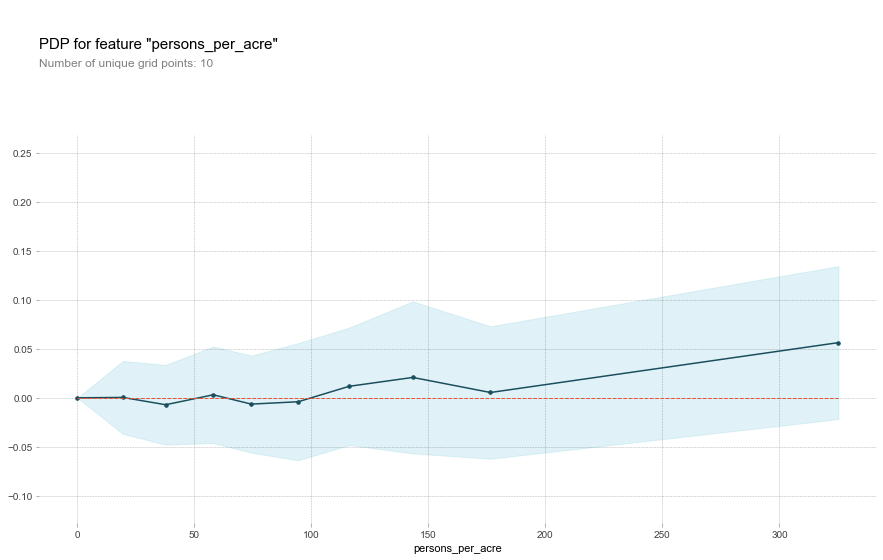

In [207]:
pdp_plot(isolated, feature_name=feature)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a626946d0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a583f68d0>})

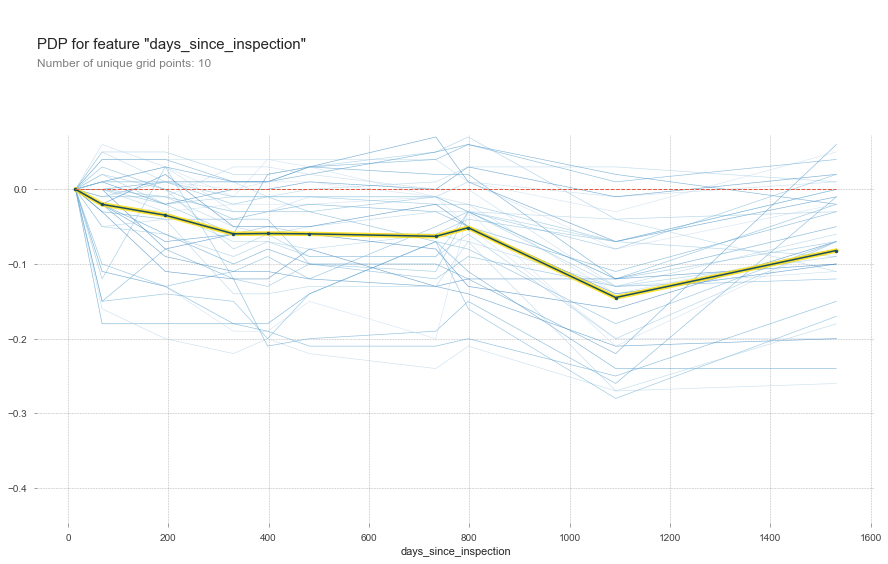

In [757]:
pdp_plot(isolated, feature_name = feature, plot_lines=True, frac_to_plot=0.01)
# plt.xlim(())

In [716]:
np.timedelta64(1,'D')

numpy.timedelta64(1,'D')

In [174]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

In [173]:
# X_train['population']
# TODO: ADD TO FEATURE ENGINEERING
X_train['population'] = X_train['population'].replace({',':''},regex=True).apply(pd.to_numeric,1).astype(float)

X_val['population'] = X_val['population'].replace({',':''},regex=True).apply(pd.to_numeric,1).astype(float)

In [204]:
# features = ['critical violations prior', 'score prior']
features = ['female to male', 'adults to minor']

interaction = pdp_interact(
    model=pipeline,
    dataset=pd.DataFrame(X_val_imputed,columns=X_val.columns),
    model_features=X_val.columns,
    features=features
)

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x130e29450>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a5459aa50>})

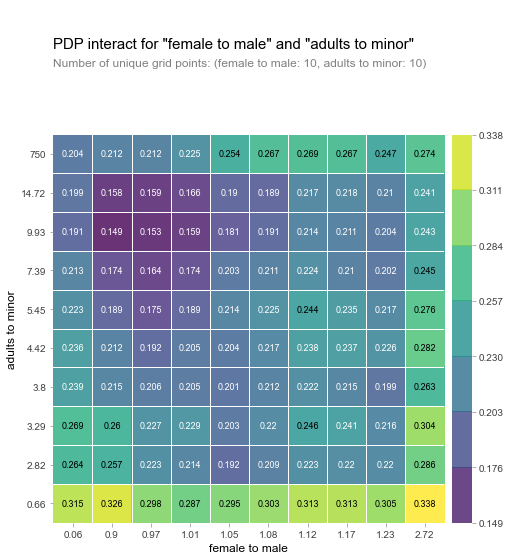

In [205]:
pdp_interact_plot(interaction, plot_type='grid',
                  feature_names=features)

In [269]:
# # Why did the model predict this?
# # Look at a Shapley Values Force Plot
# import shap

# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(row)

# shap_values# Why did the model predict this?
# # Look at a Shapley Values Force Plot

In [776]:
census_data = pd.read_csv('/Users/jasimrashid/Projects/nyc_census_tracts.csv')
census_data = census_data.rename(columns={'CensusTract' : 'census tract'})
census_data['WTM_ratio'] = census_data['Women']/census_data['Men']

In [815]:
# census_data['census tract'].str.contains('5000100')
census = census_data['census tract'].astype(str)
census.str.contains('5000100').sum()


1

In [816]:
# census_data['census tract'].str.contains('5000100')
census_df = df['census tract'].astype(str)
# census.str.contains('5000100').sum()
